Path of data files
- We used Colab, and put datafiles in the /content/sample_data/
- Current: /content/sample_data/{filename}
- If the path of the data file is different, you can execute it by changing the path in some cases.


Contribution: Ahyoung Oh (33.33%) | Subin Park (33.33%) | Yoora Kim (33.33%)

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import io
from scipy.stats import mode


#Data Cleaning

## Rename, Drop

Since the datasets have different column names, we changed column names in each dataset.

The column names are Country, Happiness_Rank, Happiness_Score, GDP, Family, Health_Life_Expectancy, Freedom, Corruption, Generosity.

Drop columns that are not common in all datasets and change order of colums.

In [ ]:
df2015 = pd.read_csv('/content/sample_data/2015.csv')
df2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [ ]:
df2015 = df2015.drop(columns = ['Region', 'Dystopia Residual', 'Standard Error'])

In [ ]:
df2015 = df2015.rename(columns={'Happiness Rank':'Happiness_Rank', 'Happiness Score': 'Happiness_Score',
                   'Economy (GDP per Capita)':'GDP', 
                   'Health (Life Expectancy)' : 'Health_Life_Expectancy', 
                   'Trust (Government Corruption)' : 'Corruption'
                   })
df2015

,Country,Happiness_Rank,Happiness_Score,GDP,Family,Health_Life_Expectancy,Freedom,Corruption,Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [ ]:
df2016 = pd.read_csv('/content/sample_data/2016.csv')
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [ ]:
df2016 = df2016.drop(columns = ['Region', 'Dystopia Residual','Upper Confidence Interval','Lower Confidence Interval' ])

In [ ]:
df2016 = df2016.rename(columns={'Happiness Rank':'Happiness_Rank', 'Happiness Score': 'Happiness_Score',
                  'Economy (GDP per Capita)':'GDP', 
                   'Health (Life Expectancy)' : 'Health_Life_Expectancy', 
                   'Trust (Government Corruption)' : 'Corruption'
                   })
df2016

,Country,Happiness_Rank,Happiness_Score,GDP,Family,Health_Life_Expectancy,Freedom,Corruption,Generosity
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492
...,...,...,...,...,...,...,...,...,...
152,Benin,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180
153,Afghanistan,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268
154,Togo,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517
155,Syria,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397


In [ ]:
df2017 = pd.read_csv('/content/sample_data/2017.csv')
df2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [ ]:
df2017 = df2017.drop(columns = ['Dystopia.Residual', 'Whisker.high', 'Whisker.low'])

In [ ]:
col = df2017.columns.tolist()
newcol = col[0:7] + col[8:] + col[7:8]
newcol
df2017 = df2017[newcol]
df2017 = df2017.rename(columns={'Happiness.Rank':'Happiness_Rank', 'Happiness.Score': 'Happiness_Score',
                  'Economy..GDP.per.Capita.':'GDP', 
                   'Health..Life.Expectancy.' : 'Health_Life_Expectancy', 
                   'Trust..Government.Corruption.' : 'Corruption'
                   })
df2017

,Country,Happiness_Rank,Happiness_Score,GDP,Family,Health_Life_Expectancy,Freedom,Corruption,Generosity
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483
...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435


In [ ]:
df2018 = pd.read_csv('/content/sample_data/2018.csv')
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
df2018 = df2018. rename(columns={'Overall rank' : 'Happiness_Rank','Country or region' : 'Country',
                     'Score': 'Happiness_Score',
                  'GDP per capita':'GDP', 'Social support': 'Family',
                   'Healthy life expectancy' : 'Health_Life_Expectancy', 'Freedom to make life choices' : 'Freedom',
                   'Perceptions of corruption' : 'Corruption'
                   })

In [ ]:
col = df2018.columns.tolist()
newcol = col[1:2] + col[0:1] + col[2:7] + col[8:] + col[7:8]
newcol
df2018 = df2018[newcol]
df2018

,Country,Happiness_Rank,Happiness_Score,GDP,Family,Health_Life_Expectancy,Freedom,Corruption,Generosity
0,Finland,1,7.632,1.305,1.592,0.874,0.681,0.393,0.202
1,Norway,2,7.594,1.456,1.582,0.861,0.686,0.340,0.286
2,Denmark,3,7.555,1.351,1.590,0.868,0.683,0.408,0.284
3,Iceland,4,7.495,1.343,1.644,0.914,0.677,0.138,0.353
4,Switzerland,5,7.487,1.420,1.549,0.927,0.660,0.357,0.256
...,...,...,...,...,...,...,...,...,...
151,Yemen,152,3.355,0.442,1.073,0.343,0.244,0.064,0.083
152,Tanzania,153,3.303,0.455,0.991,0.381,0.481,0.097,0.270
153,South Sudan,154,3.254,0.337,0.608,0.177,0.112,0.106,0.224
154,Central African Republic,155,3.083,0.024,0.000,0.010,0.305,0.038,0.218


In [ ]:
df2019 = pd.read_csv('/content/sample_data/2019.csv')
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
df2019 = df2019.rename(columns={'Overall rank' : 'Happiness_Rank','Country or region' : 'Country',
                     'Score': 'Happiness_Score',
                  'GDP per capita':'GDP', 'Social support': 'Family',
                   'Healthy life expectancy' : 'Health_Life_Expectancy', 'Freedom to make life choices' : 'Freedom',
                   'Perceptions of corruption' : 'Corruption'
                   })

In [ ]:
col = df2019.columns.tolist()
newcol = col[1:2] + col[0:1] + col[2:7] + col[8:] + col[7:8]
newcol
df2019 = df2019[newcol]
df2019

,Country,Happiness_Rank,Happiness_Score,GDP,Family,Health_Life_Expectancy,Freedom,Corruption,Generosity
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322
...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.411,0.217
152,Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.147,0.276
153,Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158
154,Central African Republic,155,3.083,0.026,0.000,0.105,0.225,0.035,0.235


## Fill the NaN value

we found one NaN value in the 2018 data.\
The NaN value was filled in with the mean values for 5 years excluding 2018 of the corresponding country's column values.\
This is because we thought that if the mean value was different because of the Nan value, it would interfere with model prediction.

In [ ]:
# Make new df (index = country)
df2015idxc = df2015.set_index('Country')
df2016idxc = df2016.set_index('Country')
df2017idxc = df2017.set_index('Country')
df2018idxc = df2018.set_index('Country')
df2019idxc = df2019.set_index('Country')

In [ ]:
# No duplication data, so will not drop duplication
# df2018 has one NaN value
# we can find the index of NaN value (19)
df2018.loc[df2018['Corruption'].isna()]

# we found United Arab Emirates has NaN in Corruption, put mean value in NaN
uae_corruption_mean = (df2015idxc.loc["United Arab Emirates"]["Corruption"] + df2016idxc.loc["United Arab Emirates"]["Corruption"] + df2017idxc.loc["United Arab Emirates"]["Corruption"] + df2019idxc.loc["United Arab Emirates"]["Corruption"]) / 4

df2018.loc[19, "Corruption"] = uae_corruption_mean

# Update df2018idxc
df2018idxc = df2018.set_index('Country')

df2018.loc[19]

Country                   United Arab Emirates
Happiness_Rank                              20
Happiness_Score                          6.774
GDP                                      2.096
Family                                   0.776
Health_Life_Expectancy                    0.67
Freedom                                  0.284
Corruption                            0.311982
Generosity                               0.186
Name: 19, dtype: object

## Outlier
There are some outliers in Health Life Support, GDP, Freedom, and Family.

We found that Corruption and Generosity have many outliers.

However, we decided not to remove the outliers because the values in each column can vary greatly depending on the country.


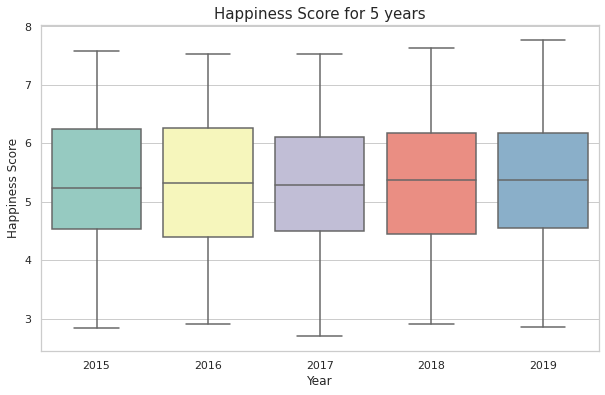

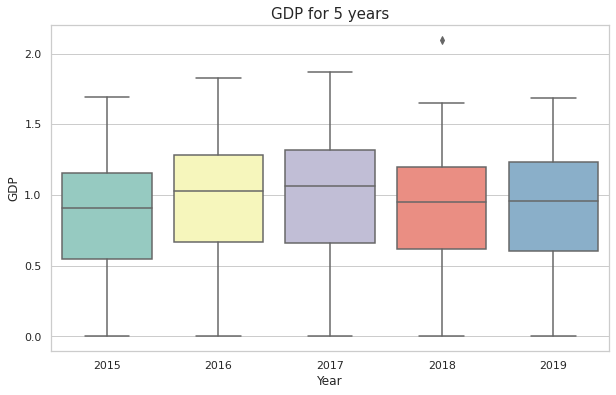

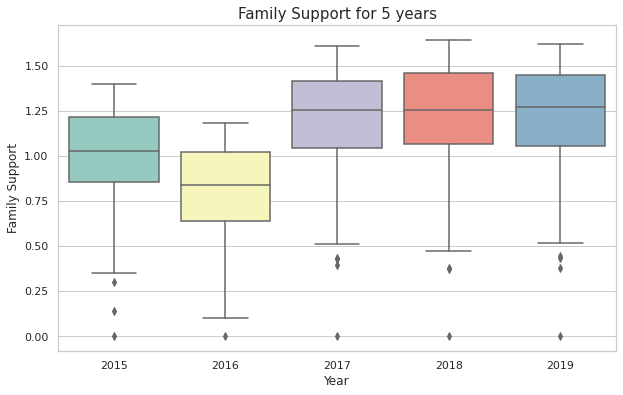

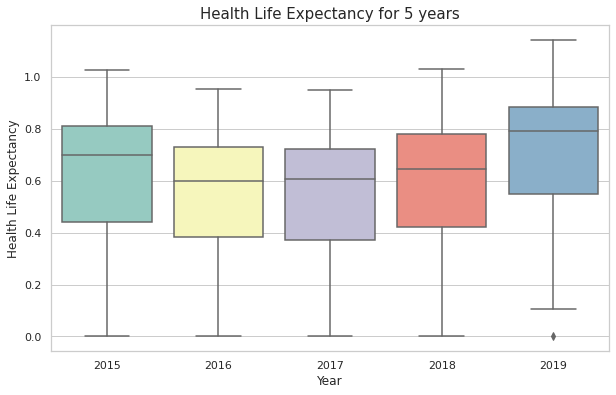

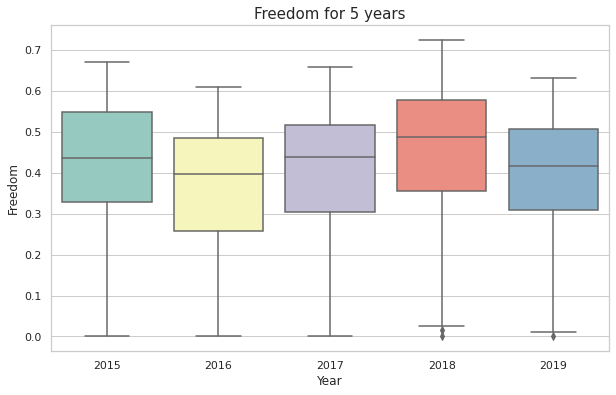

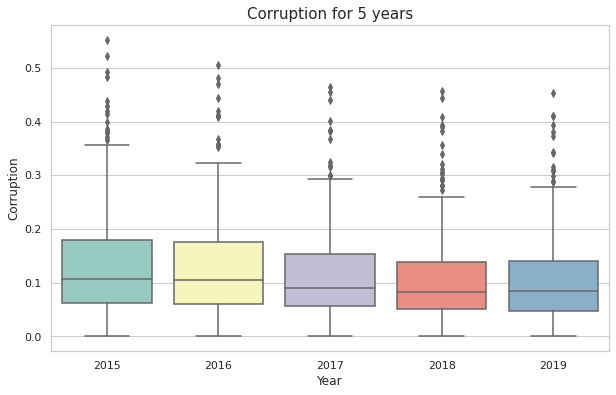

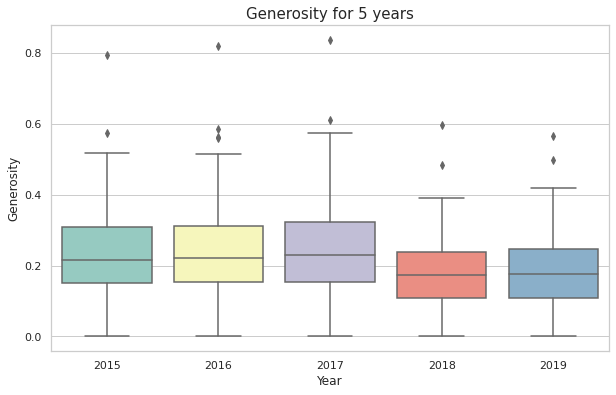

In [ ]:
# Outlier check (we will not drop outlier)

# 1. Happiness Score
dfscore = pd.concat([df2015['Happiness_Score'], df2016['Happiness_Score'], df2017['Happiness_Score'], df2018['Happiness_Score'], df2019['Happiness_Score']], axis = 1, keys=[2015, 2016, 2017, 2018, 2019])
sns.set(style="whitegrid", rc = {'figure.figsize':(10, 6)}, palette = "Set3")
sns.boxplot(data = dfscore)
plt.xlabel('Year');
plt.ylabel('Happiness Score');
plt.title('Happiness Score for 5 years', fontsize=15)
plt.show()

# 2. GDP
dfgdp = pd.concat([df2015['GDP'], df2016['GDP'], df2017['GDP'], df2018['GDP'], df2019['GDP']], axis = 1, keys=[2015, 2016, 2017, 2018, 2019])
sns.set(style="whitegrid", rc = {'figure.figsize':(10, 6)}, palette = "Set3")
sns.boxplot(data = dfgdp)
plt.xlabel('Year');
plt.ylabel('GDP');
plt.title('GDP for 5 years', fontsize=15)
plt.show()

# 3. Family
dffamily = pd.concat([df2015['Family'], df2016['Family'], df2017['Family'], df2018['Family'], df2019['Family']], axis = 1, keys=[2015, 2016, 2017, 2018, 2019])
sns.set(style="whitegrid", rc = {'figure.figsize':(10, 6)}, palette = "Set3")
sns.boxplot(data = dffamily)
plt.xlabel('Year');
plt.ylabel('Family Support');
plt.title('Family Support for 5 years', fontsize=15)
plt.show()

# 4. Health Life Expectancy
dfhealth = pd.concat([df2015['Health_Life_Expectancy'], df2016['Health_Life_Expectancy'], df2017['Health_Life_Expectancy'], df2018['Health_Life_Expectancy'], df2019['Health_Life_Expectancy']], axis = 1, keys=[2015, 2016, 2017, 2018, 2019])
sns.set(style="whitegrid", rc = {'figure.figsize':(10, 6)}, palette = "Set3")
sns.boxplot(data = dfhealth)
plt.xlabel('Year');
plt.ylabel('Health Life Expectancy');
plt.title('Health Life Expectancy for 5 years', fontsize=15)
plt.show()

# 5. Freedom
dffreedom = pd.concat([df2015['Freedom'], df2016['Freedom'], df2017['Freedom'], df2018['Freedom'], df2019['Freedom']], axis = 1, keys=[2015, 2016, 2017, 2018, 2019])
sns.set(style="whitegrid", rc = {'figure.figsize':(10, 6)}, palette = "Set3")
sns.boxplot(data = dffreedom)
plt.xlabel('Year');
plt.ylabel('Freedom');
plt.title('Freedom for 5 years', fontsize=15)
plt.show()

# 6. Corruption
dfcorruption = pd.concat([df2015['Corruption'], df2016['Corruption'], df2017['Corruption'], df2018['Corruption'], df2019['Corruption']], axis = 1, keys=[2015, 2016, 2017, 2018, 2019])
sns.set(style="whitegrid", rc = {'figure.figsize':(10, 6)}, palette = "Set3")
sns.boxplot(data = dfcorruption)
plt.xlabel('Year');
plt.ylabel('Corruption');
plt.title('Corruption for 5 years', fontsize=15)
plt.show()

# 7. Generosity
dfgenerosity = pd.concat([df2015['Generosity'], df2016['Generosity'], df2017['Generosity'], df2018['Generosity'], df2019['Generosity']], axis = 1, keys=[2015, 2016, 2017, 2018, 2019])
sns.set(style="whitegrid", rc = {'figure.figsize':(10, 6)}, palette = "Set3")
sns.boxplot(data = dfgenerosity)
plt.xlabel('Year');
plt.ylabel('Generosity');
plt.title('Generosity for 5 years', fontsize=15)
plt.show()

## Merge
Train: 2015 - 2018

Test: 2019

x: Happiness_Rank, GDP, Family, Health_Life_Expectancy, Freedom, Corruption,, Generosity

y: Happiness_Score

In [ ]:
frames = [df2015, df2016, df2017, df2018]
# Merge 2015 - 2018 data to make train data
train = pd.concat(frames)
# Declare test data
test = df2019

# Store country
train_country = train['Country']
test_country = test['Country']

# split test, train data
# train_x - country, rank, score drop
x_train = train.drop(['Country', 'Happiness_Rank', 'Happiness_Score'], axis=1)
# test_x - country, rank, score drop
y_train = train[['Happiness_Score']]
# train_y - score
x_test = test.drop(['Country', 'Happiness_Rank', 'Happiness_Score'], axis=1)
# test_y - score
y_test = test[['Happiness_Score']]


# Visualization

## Question 1
What are the central tendencies of happiness scores over the years? Did they increase or Decrease?

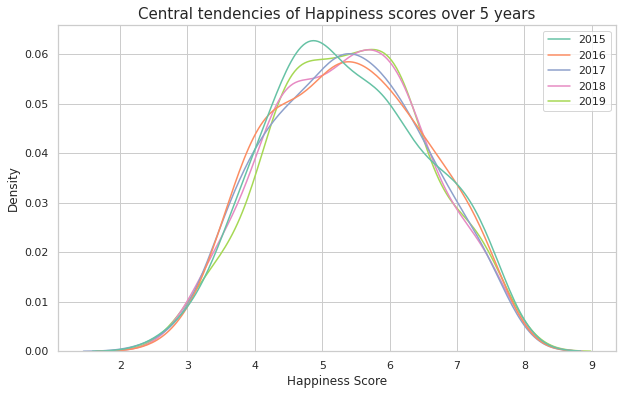

In [ ]:
dfscore = pd.concat([df2015['Happiness_Score'], df2016['Happiness_Score'], df2017['Happiness_Score'], df2018['Happiness_Score'], df2019['Happiness_Score']], axis = 1, keys=[2015, 2016, 2017, 2018, 2019])
sns.set(style="whitegrid", rc = {'figure.figsize':(10, 6)}, palette = "Set2")
sns.kdeplot(data = dfscore)
plt.xlabel('Happiness Score');
plt.ylabel('Density');
plt.title('Central tendencies of Happiness scores over 5 years', fontsize=15)
plt.show()

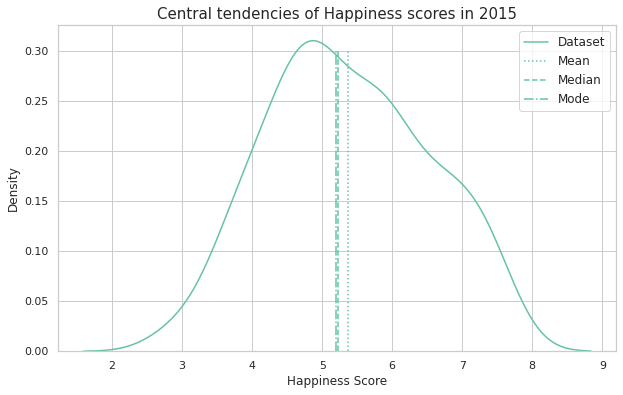

Mean: 5.3757341772151905
Median: 5.2325
Mode: 5.192
Central tendency: 0.18373417721519036


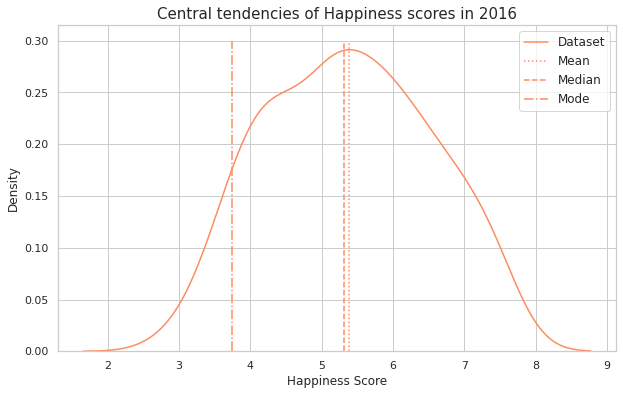

Mean: 5.382184713375795
Median: 5.314
Mode: 3.739
Central tendency: 1.6431847133757955


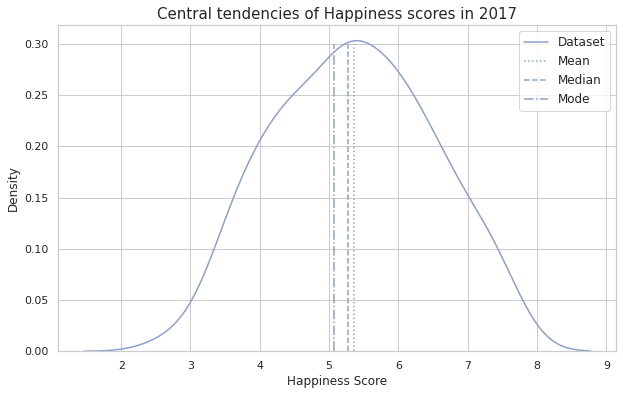

Mean: 5.354019355773926
Median: 5.27899980545044
Mode: 5.07399988174438
Central tendency: 0.28001947402954563


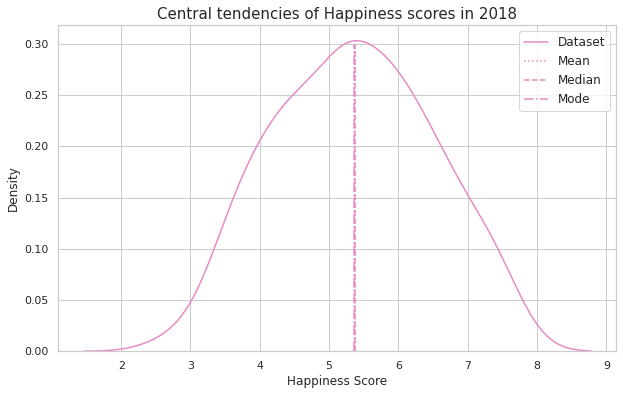

Mean: 5.375916666666668
Median: 5.378
Mode: 5.358
Central tendency: 0.020000000000000462


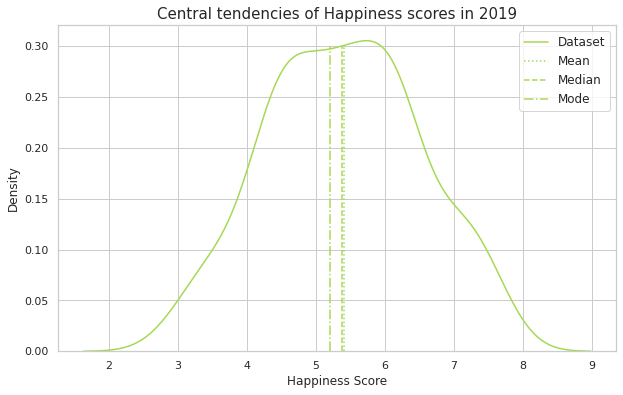

Mean: 5.407096153846153
Median: 5.3795
Mode: 5.208
Central tendency: 0.19909615384615265


In [ ]:
# Central tendency of 2015
mean2015 = np.mean(dfscore[2015].dropna())
median2015 = np.median(dfscore[2015].dropna())
mode2015 = mode(dfscore[2015].dropna())[0][0]
central2015 = max(mean2015, median2015, mode2015) - min(mean2015, median2015, mode2015)

sns.set(style="whitegrid", rc = {'figure.figsize':(10, 6)})
sns.kdeplot(data = dfscore[2015], label = 'Data Set', color='#66c2a5')
plt.vlines(x = mean2015, ymin=0, ymax=0.3, color='#66c2a5', linestyle="dotted", label='Mean')
plt.vlines(x = median2015, ymin=0, ymax=0.3, color='#66c2a5', linestyle='dashed', label='Median')
plt.vlines(x = mode2015, ymin=0, ymax=0.3, color='#66c2a5', linestyle='dashdot', label='Mode')
plt.legend(['Dataset', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.xlabel('Happiness Score');
plt.ylabel('Density');
plt.title('Central tendencies of Happiness scores in 2015', fontsize=15)
plt.show()

print("Mean:", mean2015)
print("Median:", median2015)
print("Mode:", mode2015)
print("Central tendency:", central2015)

# Central tendency of 2016
mean2016 = np.mean(dfscore[2016].dropna())
median2016 = np.median(dfscore[2016].dropna())
mode2016 = mode(dfscore[2016].dropna())[0][0]
central2016 = max(mean2016, median2016, mode2016) - min(mean2016, median2016, mode2016)

sns.set(style="whitegrid", rc = {'figure.figsize':(10, 6)})
sns.kdeplot(data = dfscore[2016], label = 'Data Set', color='#fc8d62')
plt.vlines(x = mean2016, ymin=0, ymax=0.3, color='#fc8d62', linestyle="dotted", label='Mean')
plt.vlines(x = median2016, ymin=0, ymax=0.3, color='#fc8d62', linestyle='dashed', label='Median')
plt.vlines(x = mode2016, ymin=0, ymax=0.3, color='#fc8d62', linestyle='dashdot', label='Mode')
plt.legend(['Dataset', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.xlabel('Happiness Score');
plt.ylabel('Density');
plt.title('Central tendencies of Happiness scores in 2016', fontsize=15)
plt.show()

print("Mean:", mean2016)
print("Median:", median2016)
print("Mode:", mode2016)
print("Central tendency:", central2016)

# Central tendency of 2017
mean2017 = np.mean(dfscore[2017].dropna())
median2017 = np.median(dfscore[2017].dropna())
mode2017 = mode(dfscore[2017].dropna())[0][0]
central2017 = max(mean2017, median2017, mode2017) - min(mean2017, median2017, mode2017)

sns.set(style="whitegrid", rc = {'figure.figsize':(10, 6)})
sns.kdeplot(data = dfscore[2017], label = 'Data Set', color='#8da0cb')
plt.vlines(x = mean2017, ymin=0, ymax=0.3, color='#8da0cb', linestyle="dotted", label='Mean')
plt.vlines(x = median2017, ymin=0, ymax=0.3, color='#8da0cb', linestyle='dashed', label='Median')
plt.vlines(x = mode2017, ymin=0, ymax=0.3, color='#8da0cb', linestyle='dashdot', label='Mode')
plt.legend(['Dataset', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.xlabel('Happiness Score');
plt.ylabel('Density');
plt.title('Central tendencies of Happiness scores in 2017', fontsize=15)
plt.show()

print("Mean:", mean2017)
print("Median:", median2017)
print("Mode:", mode2017)
print("Central tendency:", central2017)

# Central tendency of 2018
mean2018 = np.mean(dfscore[2018].dropna())
median2018 = np.median(dfscore[2018].dropna())
mode2018 = mode(dfscore[2018].dropna())[0][0]
central2018 = max(mean2018, median2018, mode2018) - min(mean2018, median2018, mode2018)

sns.set(style="whitegrid", rc = {'figure.figsize':(10, 6)}, palette = "Set2")
sns.kdeplot(data = dfscore[2017], label = 'Data Set', color='#e78ac3')
plt.vlines(x = mean2018, ymin=0, ymax=0.3, color='#e78ac3', linestyle="dotted", label='Mean')
plt.vlines(x = median2018, ymin=0, ymax=0.3, color='#e78ac3', linestyle='dashed', label='Median')
plt.vlines(x = mode2018, ymin=0, ymax=0.3, color='#e78ac3', linestyle='dashdot', label='Mode')
plt.legend(['Dataset', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.xlabel('Happiness Score');
plt.ylabel('Density');
plt.title('Central tendencies of Happiness scores in 2018', fontsize=15)
plt.show()

print("Mean:", mean2018)
print("Median:", median2018)
print("Mode:", mode2018)
print("Central tendency:", central2018)

# Central tendency of 2019
mean2019 = np.mean(dfscore[2019].dropna())
median2019 = np.median(dfscore[2019].dropna())
mode2019 = mode(dfscore[2019].dropna())[0][0]
central2019 = max(mean2019, median2019, mode2019) - min(mean2019, median2019, mode2019)

sns.set(style="whitegrid", rc = {'figure.figsize':(10, 6)}, palette = "Set2")
sns.kdeplot(data = dfscore[2019], label = 'Data Set', color='#a6d854')
plt.vlines(x = mean2019, ymin=0, ymax=0.3, color='#a6d854', linestyle="dotted", label='Mean')
plt.vlines(x = median2019, ymin=0, ymax=0.3, color='#a6d854', linestyle='dashed', label='Median')
plt.vlines(x = mode2019, ymin=0, ymax=0.3, color='#a6d854', linestyle='dashdot', label='Mode')
plt.legend(['Dataset', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.xlabel('Happiness Score');
plt.ylabel('Density');
plt.title('Central tendencies of Happiness scores in 2019', fontsize=15)
plt.show()

print("Mean:", mean2019)
print("Median:", median2019)
print("Mode:", mode2019)
print("Central tendency:", central2019)

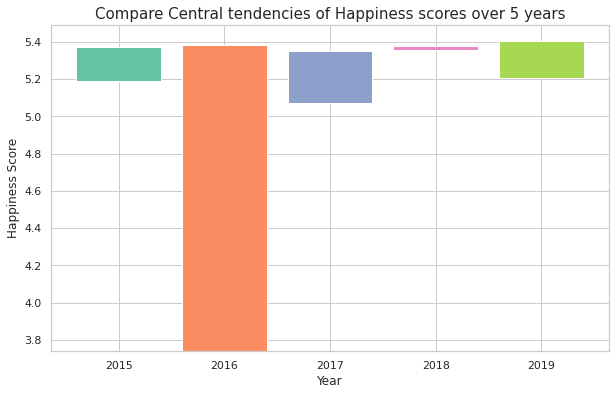

In [ ]:
# Compare central tendencies

years = [2015, 2016, 2017, 2018, 2019]
maxs = [max(mean2015, median2015, mode2015), max(mean2016, median2016, mode2016),max(mean2017, median2017, mode2017),max(mean2018, median2018, mode2018), max(mean2019, median2019, mode2019)]
mins = [min(mean2015, median2015, mode2015), min(mean2016, median2016, mode2016),min(mean2017, median2017, mode2017),min(mean2018, median2018, mode2018), min(mean2019, median2019, mode2019)]
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']
sns.set(style="whitegrid", rc = {'figure.figsize':(10, 6)})

for i in range(len(years)):
  plt.bar(years[i], maxs[i]-mins[i], bottom=mins[i], color = colors[i])

plt.ylabel('Happiness Score');
plt.xlabel('Year');
plt.title('Compare Central tendencies of Happiness scores over 5 years', fontsize=15)
plt.show()



Central tendency = max(mean, mode, median) - min(mean, mode, median)

2015: 0.18\
2016: 1.64\
2017: 0.28\
2018: 0.02\
2019: 0.20

2016 > 2017 > 2019 > 2015 > 2018

The central tendency of 2016 is the largest, and the central tendency of 2018 is the smallest.\
Central tendency increased sharply between 2015 and 2016.\
Central tendency decreased from 2016 to 2018.\
Central tendency increased from 2018 to 2019.

## Question 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


0.3333333333333333 92    Netherlands
93    New Zealand
Name: Country, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 137
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    81 non-null     object 
 1   2015-2016  81 non-null     int64  
 2   2016-2017  81 non-null     int64  
 3   2017-2018  81 non-null     int64  
 4   mean       81 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.8+ KB
None
Top 5 improved countries:  62    Ivory Coast
44          Gabon
71         Latvia
53        Hungary
19       Bulgaria
Name: Country, dtype: object
2015 Top 5 Happy Countries
0    Switzerland
1        Iceland
2        Denmark
3         Norway
4         Canada
Name: Country, dtype: object
2016 Top 5 Happy Countries
0        Denmark
1    Switzerland
2        Iceland
3         Norway
4        Finland
Name: Country, dtype: object
2017 Top 5 Happy Countries
0         Norway
1        Denmark
2        Iceland
3    Switzerland
4        Finland
Name: Coun

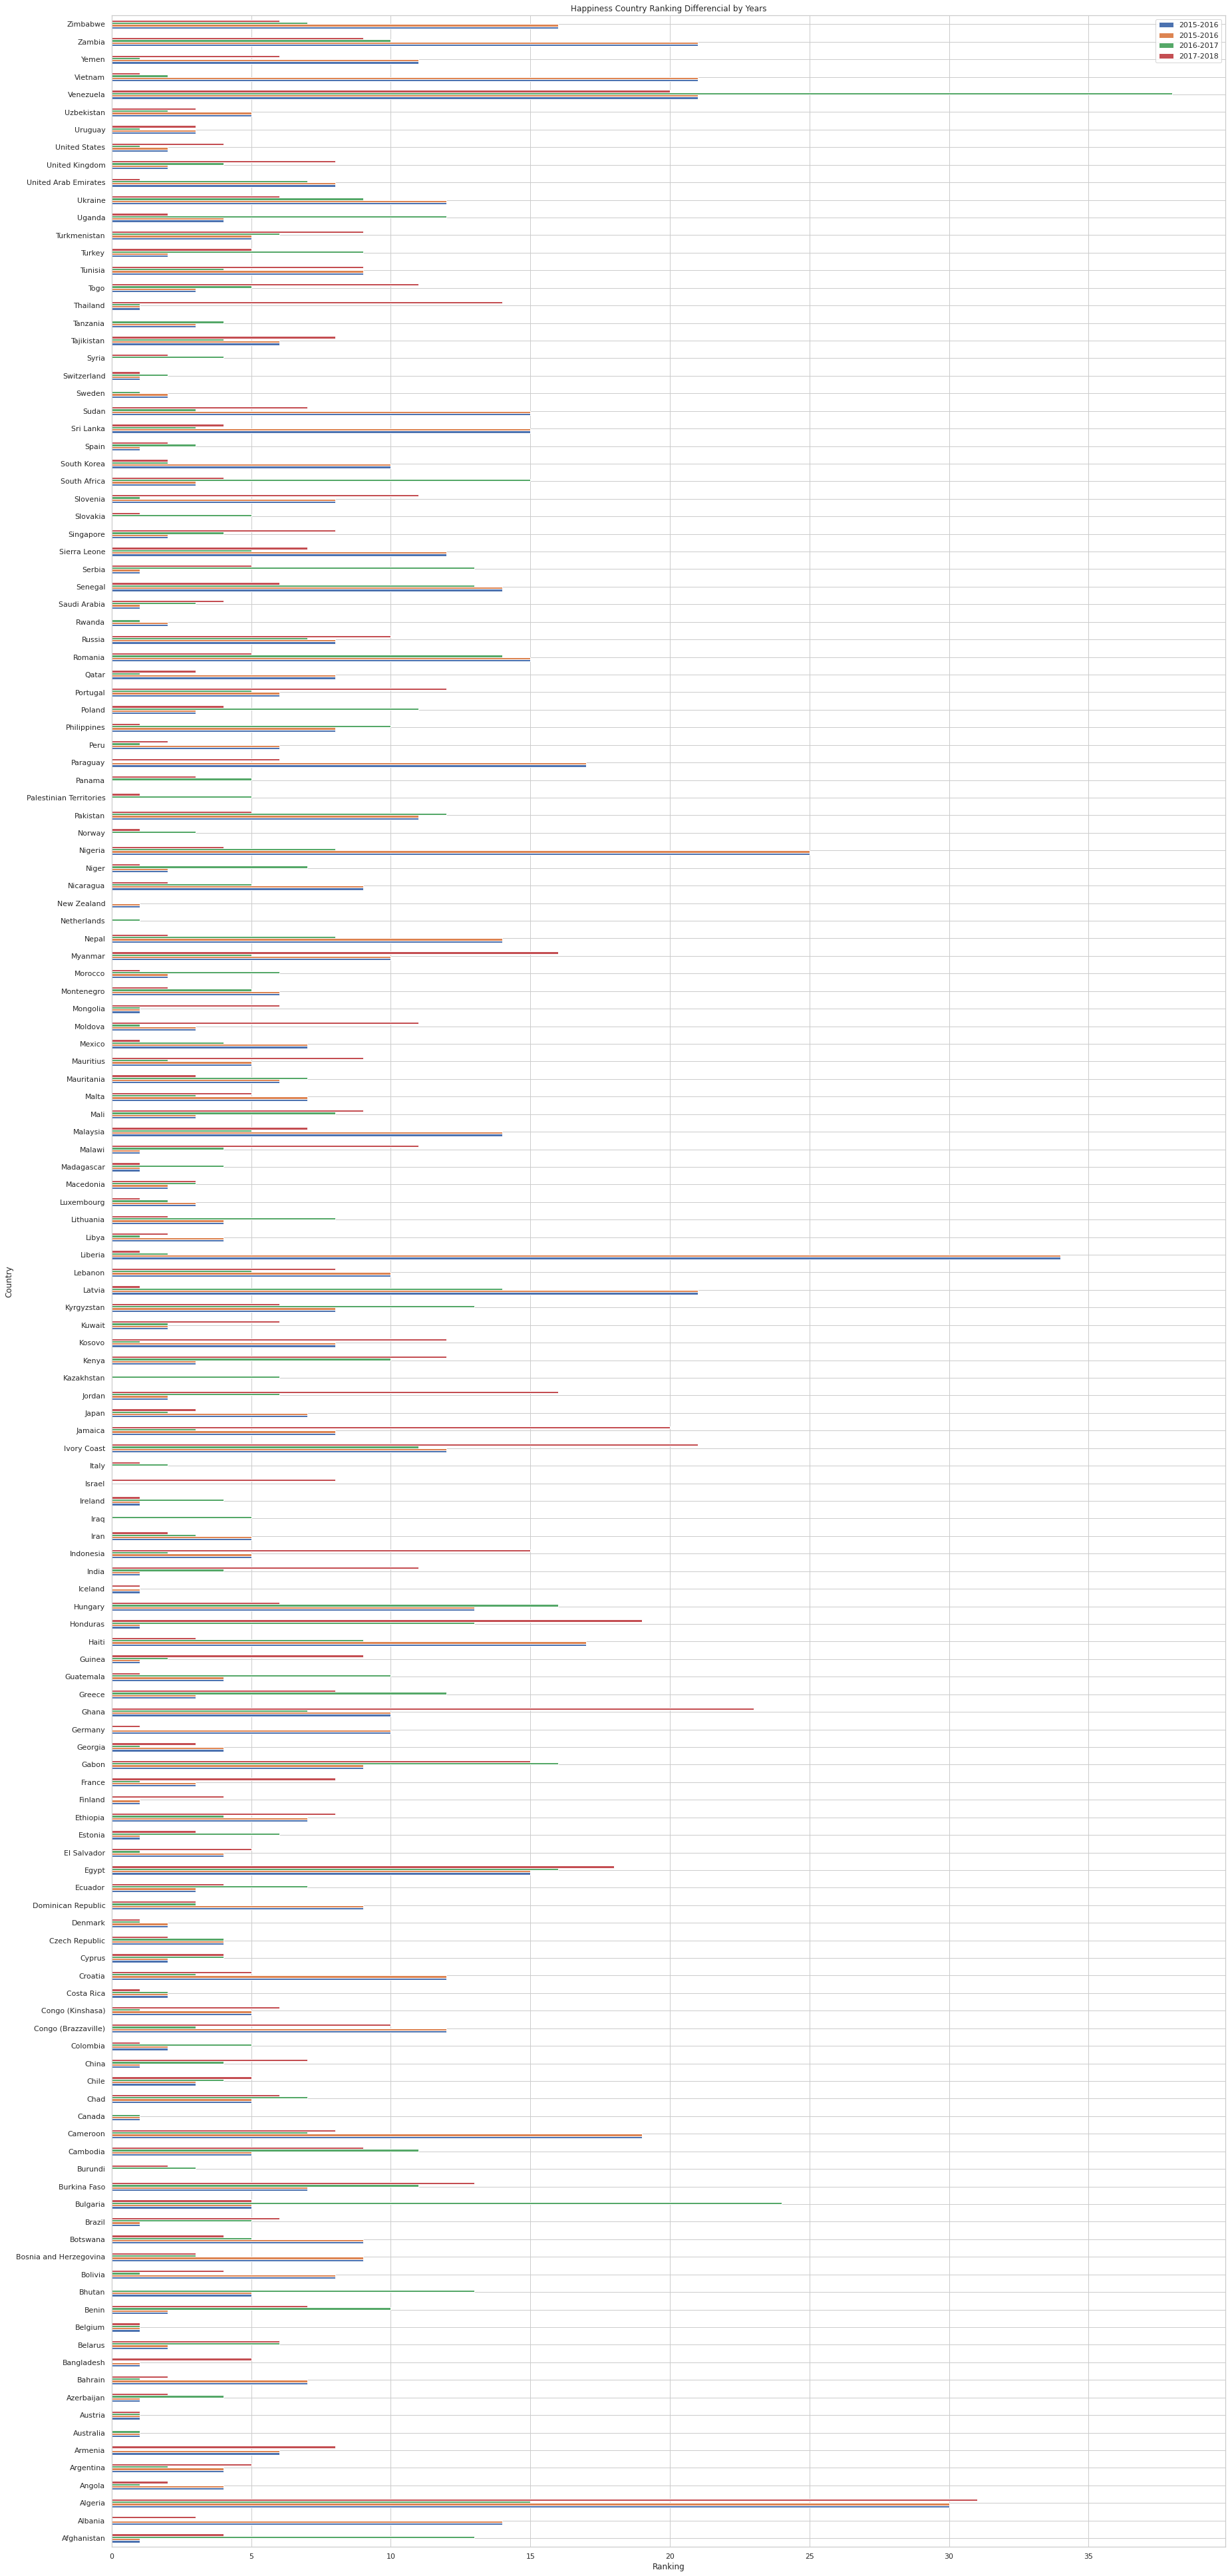

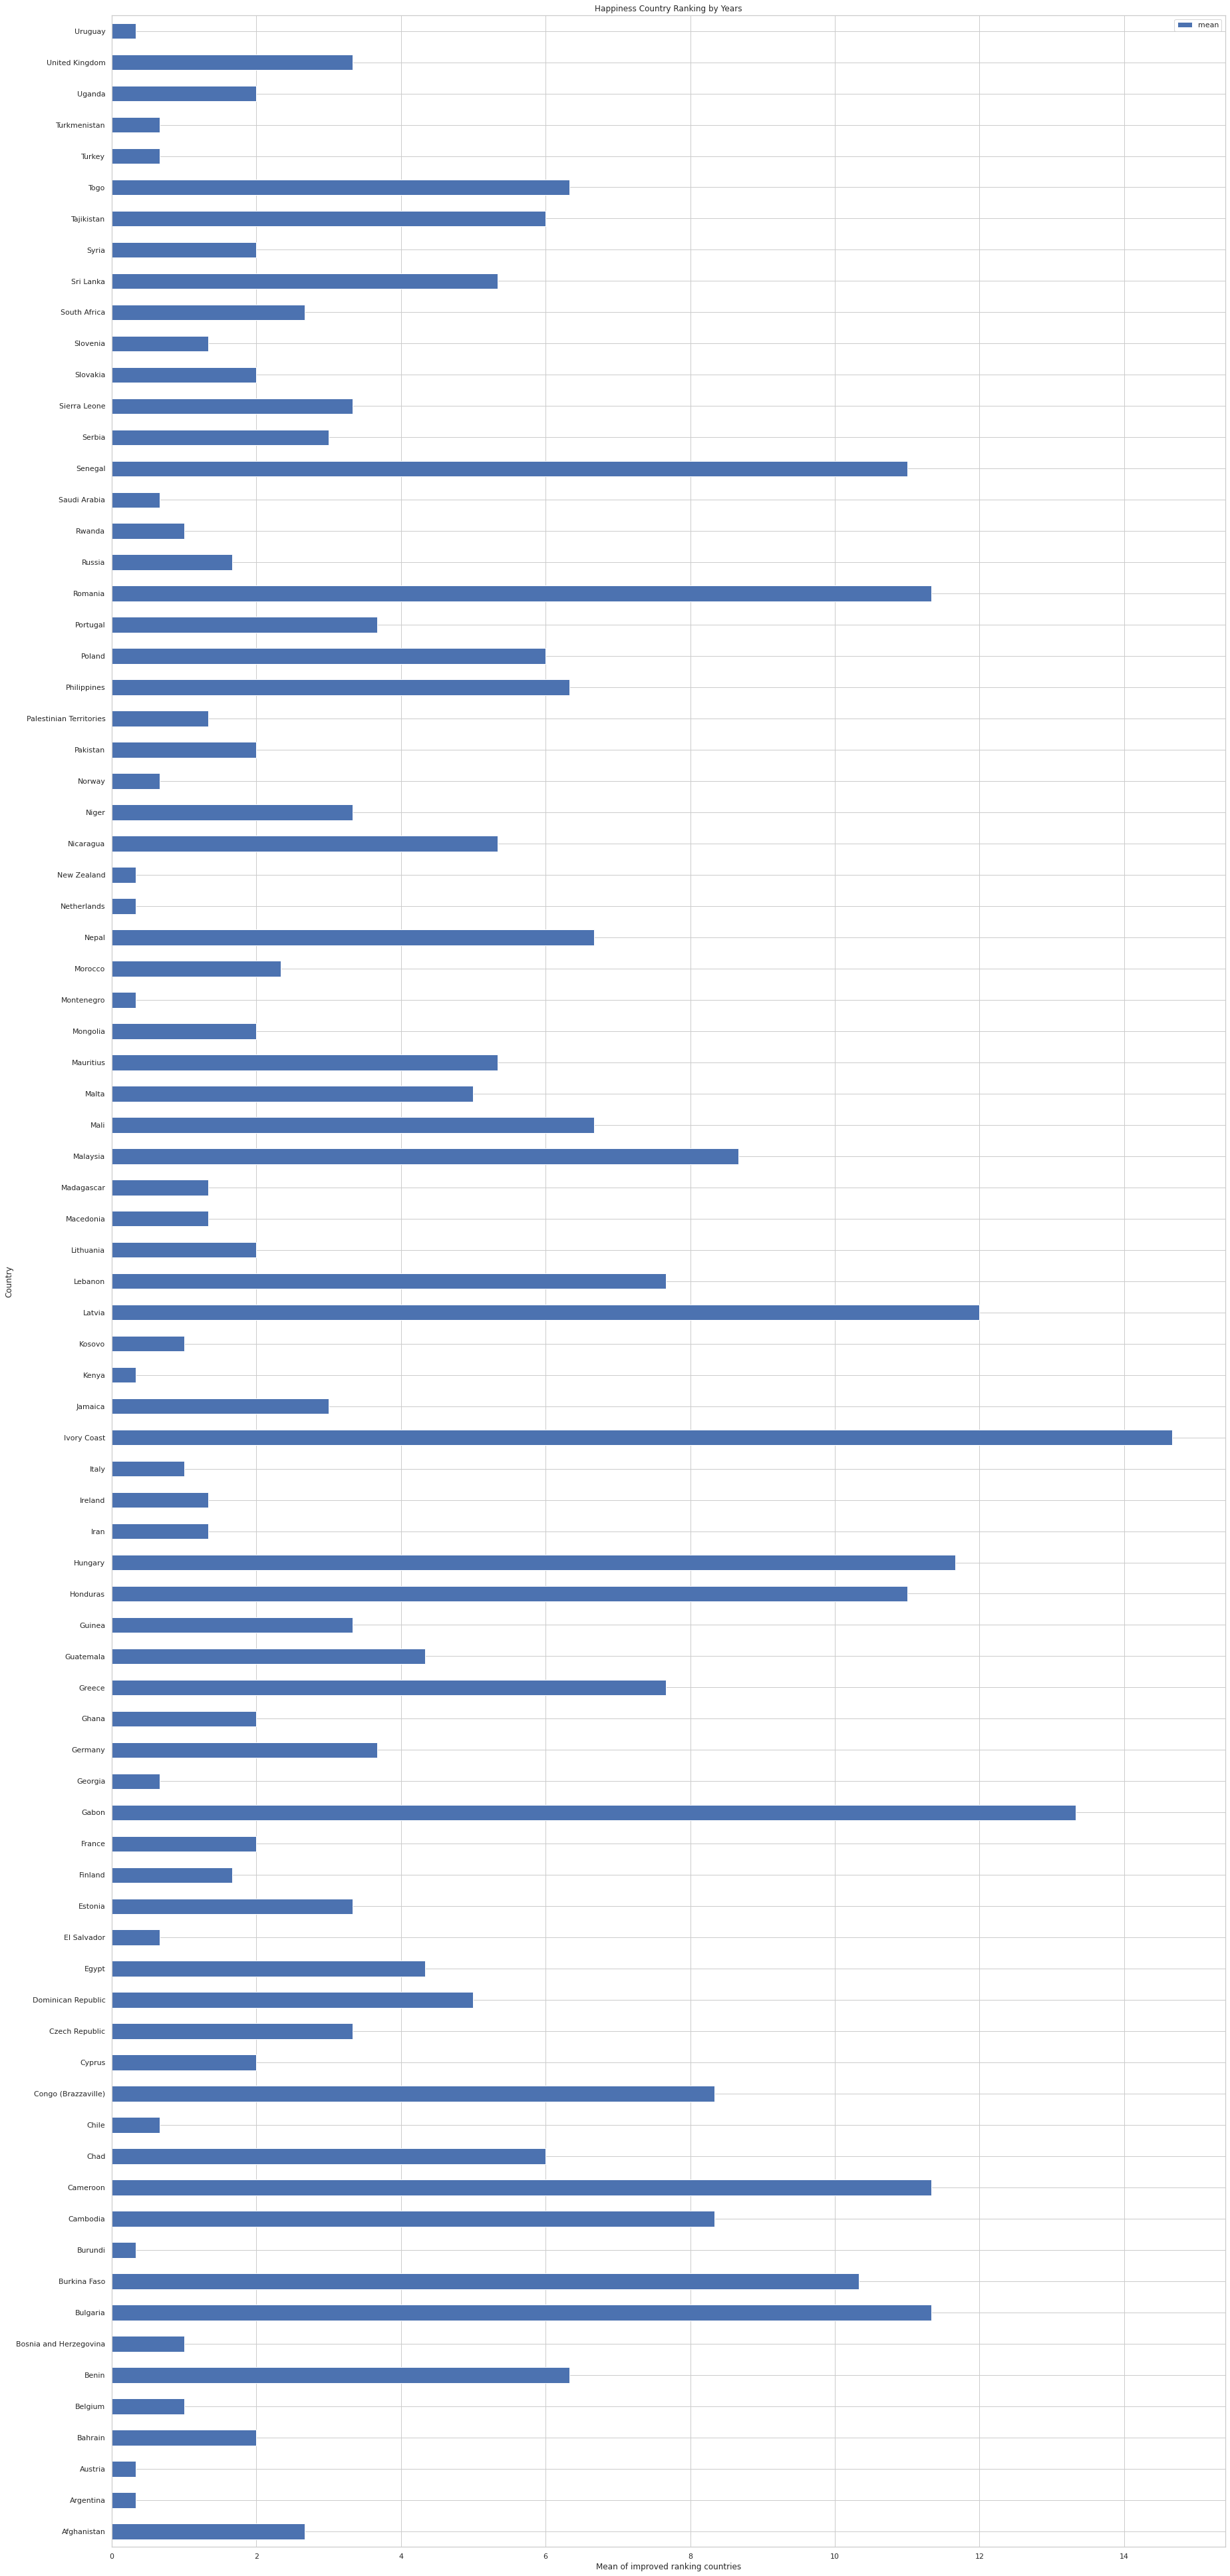

In [ ]:
# Question: Which countries have stable rankings over the years? 
rank2015 = df2015.rename(columns = {"Happiness_Rank" : "Rank_2015"})[['Country', 'Rank_2015']]
rank2015.sort_values(by=["Country"], inplace = True)
rank2016 = df2016.rename(columns = {"Happiness_Rank" : "Rank_2016"})[['Country', 'Rank_2016']]
rank2016.sort_values(by=["Country"], inplace = True)
rank2017 = df2017.rename(columns = {"Happiness_Rank" : "Rank_2017"})[['Country', 'Rank_2017']]
rank2017.sort_values(by=["Country"], inplace = True)
rank2018 = df2018.rename(columns = {"Happiness_Rank" : "Rank_2018"})[['Country', 'Rank_2018']]
rank2018.sort_values(by=["Country"], inplace = True)
rank2015 = rank2015.merge(rank2016, how='inner', on='Country').merge(rank2017, how='inner', on='Country').merge(rank2018, how='inner', on='Country')

df = pd.DataFrame([], columns=["Country", "2015-2016", "2016-2017", "2017-2018"])
df['Country'] = rank2015['Country']
df['2015-2016'] = (rank2015['Rank_2015']-rank2015['Rank_2016']).abs()
df['2016-2017'] = (rank2015['Rank_2016']-rank2015['Rank_2017']).abs()
df['2017-2018'] = (rank2015['Rank_2017']-rank2015['Rank_2018']).abs()
# Add mean
df['mean'] = df.mean(axis=1)
# Find smallest mean
mindiff = df['mean'].min()
# Find the stable country
stables = df.loc[df['mean'] == mindiff]["Country"]
print(mindiff, stables)
# plotting graph
ax = df.plot(x="Country", y=["2015-2016", "2015-2016", "2016-2017", "2017-2018"], kind="barh", figsize=(30,70),  title='Happiness Country Ranking Differencial by Years')
ax.set_xlabel("Ranking")
# Answer: Netherlands and New Zealand. Both has mean about 0.34

# Question: Which countries improved their Rankings? 
df_improve = pd.DataFrame([], columns=["Country", "2015-2016", "2016-2017", "2017-2018"])
df_improve['Country'] = rank2015['Country']
df_improve['2015-2016'] = (rank2015['Rank_2015']-rank2015['Rank_2016'])
df_improve['2016-2017'] = (rank2015['Rank_2016']-rank2015['Rank_2017'])
df_improve['2017-2018'] = (rank2015['Rank_2017']-rank2015['Rank_2018'])
# Add mean
df_improve['mean'] = df_improve.mean(axis=1)
# Find mean greater than 0 which means improved on average
improve = df_improve[df_improve['mean'] > 0]
print(improve.info())
# Find the improved country
print('Top 5 improved countries: ', improve.sort_values(by=['mean'], ascending=False).head(5)['Country'])
# plotting graph
ax1 = improve.plot(x="Country", y=['mean'], kind="barh", figsize=(30,70), title='Happiness Country Ranking by Years')
ax1.set_xlabel("Mean of improved ranking countries")
# Answer: 81 Countries improved their ranking, top 5 countires Ivory Coast, Gabon, Latvia, Hungary, Bulgaria

# Bonus Question: top 5 happy countries by years
print('2015 Top 5 Happy Countries')
print(df2015.sort_values(by=['Happiness_Rank']).head(5)['Country'])
print('2016 Top 5 Happy Countries')
print(df2016.sort_values(by=['Happiness_Rank']).head(5)['Country'])
print('2017 Top 5 Happy Countries')
print(df2017.sort_values(by=['Happiness_Rank']).head(5)['Country'])
print('2018 Top 5 Happy Countries')
print(df2018.sort_values(by=['Happiness_Rank']).head(5)['Country'])
# Answer: 
# 2015 Top 5 Happy Countries: Switzerland, Iceland, Denmark, Norway,Canada
# 2016 Top 5 Happy Countries: Denmark, Switzerland, Iceland, Norway, Finland
# 2017 Top 5 Happy Countries: Norway, Denmark, Iceland, Switzerland, Finland
# 2018 Top 5 Happy Countries: Finland, Norway, Denmark, Iceland, Switzerland

## Question 3.

Use correlation coeffieicnt to test rerationship between variables.

For better visualization, we used heat map. The light color stands for low correlation between variables.


In [ ]:
corr_Matrix = train[['Country','Happiness_Score','GDP','Family','Health_Life_Expectancy',
                    'Freedom','Corruption','Generosity']].corr()
corr_Matrix

,Happiness_Score,GDP,Family,Health_Life_Expectancy,Freedom,Corruption,Generosity
Happiness_Score,1.000000,0.788572,0.633668,0.754562,0.550175,0.405942,0.153310
GDP,0.788572,1.000000,0.566895,0.802116,0.331800,0.313183,-0.005222
Family,0.633668,0.566895,1.000000,0.515788,0.440701,0.133207,-0.003958
Health_Life_Expectancy,0.754562,0.802116,0.515788,1.000000,0.358951,0.270456,0.057316
Freedom,0.550175,0.331800,0.440701,0.358951,1.000000,0.457501,0.289256
Corruption,0.405942,0.313183,0.133207,0.270456,0.457501,1.000000,0.309706
Generosity,0.153310,-0.005222,-0.003958,0.057316,0.289256,0.309706,1.000000


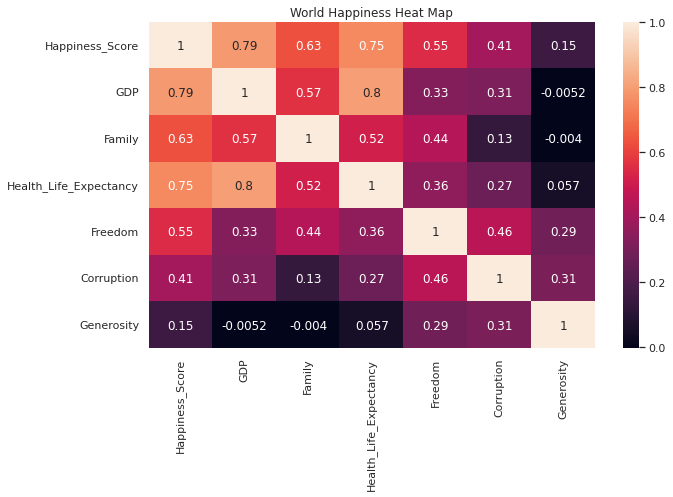

In [ ]:
sns.heatmap(corr_Matrix, annot=True)
plt.title("World Happiness Heat Map")
plt.show()

## Question 4.

To check which factor affects the most to the happiness score, used bargraph to compare correlation coefficient of happiness score and other variables.

In [ ]:
columns = train.columns.tolist()[3:]
corr = [corr_Matrix['Happiness_Score'].iloc[1], corr_Matrix['Happiness_Score'].iloc[2],
     corr_Matrix['Happiness_Score'].iloc[3],corr_Matrix['Happiness_Score'].iloc[4],
     corr_Matrix['Happiness_Score'].iloc[5],corr_Matrix['Happiness_Score'].iloc[6]]


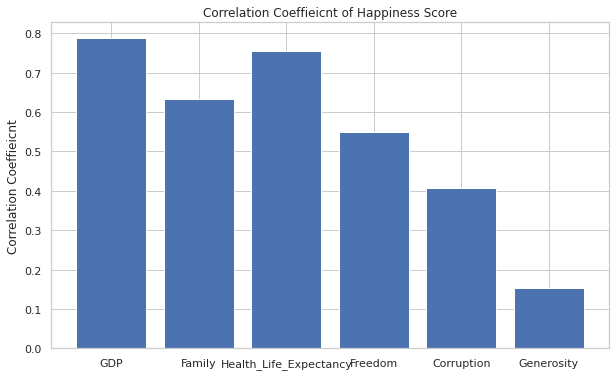

In [ ]:
from matplotlib import pyplot as plt
plt.bar(columns, corr)
plt.title("Correlation Coeffieicnt of Happiness Score")
plt.ylabel('Correlation Coeffieicnt')
plt.show()

According to the bar graph, GDP is the most important factor that affects to happiness score.

Therefore, the president should increase the GDP to make citizens happier.



# Modeling

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

# importing the libraries
linreg = LinearRegression()
linreg.fit(x_train, y_train)

# Predict
y_pred =  pd.DataFrame(linreg.predict(x_test))

# Rename
y_pred = y_pred.rename(columns={0 : 'Happiness_Score'})

# Make Happiness Rank by predicted score
y_pred['Happiness_Rank'] = y_pred['Happiness_Score'].rank(ascending = False)
y_pred = y_pred.astype({"Happiness_Rank": int}, errors='raise')

# Make dataframe for comparing actual value and predict value
predictlin = pd.DataFrame({'Country': test['Country'], 'Actual Score': y_test['Happiness_Score'], 'Actual Rank' : test['Happiness_Rank'],
                           'Predicted Score': y_pred['Happiness_Score'], 'Predicted Rank' : y_pred['Happiness_Rank']})

# Print RMSE value
print('RMSE: ', np.sqrt(mean_squared_error(y_test['Happiness_Score'], y_pred['Happiness_Score'])))
print('MAE: ', mean_absolute_error(y_test['Happiness_Score'], y_pred['Happiness_Score']))
print('MSE: ', mean_squared_error(y_test['Happiness_Score'], y_pred['Happiness_Score']))

# Get coeff , intecept for this model
coff = pd.DataFrame()
col = ['GDP',	'Family',	'Health_Life_Expectancy',	'Freedom',	'Corruption',	'Generosity']
coff['col'] = col
coff['cofficient'] = linreg.coef_.flatten()
print('\nCofficient:')
print(coff)
print('\nIntercept:',linreg.intercept_)

train_accuracy = linreg.score(x_train, y_train)
print("\nTrain Accuracy: %.2f%%" % (train_accuracy * 100.0))
test_accuracy = linreg.score(x_test, y_test)
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

RMSE:  0.5498290187334164
MAE:  0.4240904543992611
MSE:  0.30231194984135157

Cofficient:
                      col  cofficient
0                     GDP    1.094086
1                  Family    0.642875
2  Health_Life_Expectancy    1.146799
3                 Freedom    1.406374
4              Corruption    0.876137
5              Generosity    0.538830

Intercept: [2.20402325]

Train Accuracy: 76.50%
Test Accuracy: 75.44%


In [ ]:
predictlin

,Country,Actual Score,Actual Rank,Predicted Score,Predicted Rank
0,Finland,7.769,1,7.086046,11
1,Denmark,7.600,2,7.198172,4
2,Norway,7.554,3,7.320789,2
3,Iceland,7.494,4,7.059803,13
4,Netherlands,7.488,5,7.073417,12
...,...,...,...,...,...
151,Rwanda,3.334,152,5.015574,116
152,Tanzania,3.231,153,4.729972,121
153,Afghanistan,3.203,154,3.440352,155
154,Central African Republic,3.083,155,2.826607,156


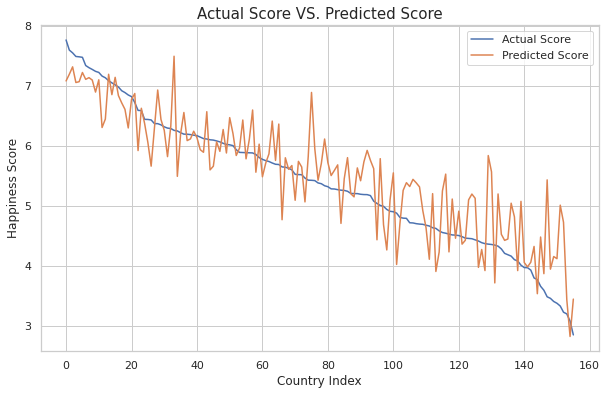

<Figure size 1152x576 with 0 Axes>

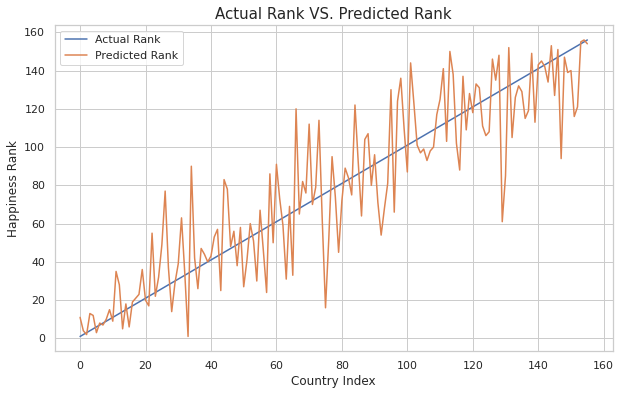

<Figure size 1152x576 with 0 Axes>

In [ ]:
# Compare Actural Score and Predicted Score
predictlin[['Actual Score', 'Predicted Score']].plot()
plt.ylabel('Happiness Score');
plt.xlabel('Country Index');
plt.title('Actual Score VS. Predicted Score', fontsize=15)
plt.figure(figsize=(16,8))
plt.show()


# Compare Actural Rank and Predicted Rank
predictlin[['Actual Rank', 'Predicted Rank']].plot()
plt.ylabel('Happiness Rank');
plt.xlabel('Country Index');
plt.title('Actual Rank VS. Predicted Rank', fontsize=15)
plt.figure(figsize=(16,8))
plt.show()

## Random Forest

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestRegressor

# create regressor
rf = RandomForestRegressor(n_estimators=50, random_state=0)
# fit the regressor with x and y data
rf.fit(x_train, y_train)
# Predicting the target values of the test set 
y_pred = pd.DataFrame(rf.predict(x_test)).rename(columns={0 : 'Happiness_Score'})
# Make Happiness Rank by predicted score
y_pred['Happiness_Rank'] = y_pred['Happiness_Score'].rank(ascending = False)
y_pred = y_pred.astype({"Happiness_Rank": int}, errors='raise')

# Make dataframe for comparing actual value and predict value
prediction = pd.DataFrame({'Country': test['Country'], 'Actual_Score': y_test['Happiness_Score'], 'Actual_Rank' : test['Happiness_Rank'],
                           'Predict_Score': y_pred['Happiness_Score'], 'Predict_Rank' : y_pred['Happiness_Rank']})
from sklearn.metrics import mean_absolute_error
# RMSE (Root Mean Square Error): about 0.65
print('\nRMSE: ', np.sqrt(mean_squared_error(y_test['Happiness_Score'], y_pred['Happiness_Score'])))
print('MAE: ', mean_absolute_error(y_test['Happiness_Score'], y_pred['Happiness_Score']))
print('MSE: ', mean_squared_error(y_test['Happiness_Score'], y_pred['Happiness_Score'])) 


RMSE:  0.6539052926273847
MAE:  0.5131982035791773
MSE:  0.4275921317261056


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
prediction

,Country,Actual_Score,Actual_Rank,Predict_Score,Predict_Rank
0,Finland,7.769,1,6.44056,11
1,Denmark,7.600,2,6.51254,7
2,Norway,7.554,3,6.49342,9
3,Iceland,7.494,4,6.33580,16
4,Netherlands,7.488,5,6.32266,21
...,...,...,...,...,...
151,Rwanda,3.334,152,4.67370,127
152,Tanzania,3.231,153,5.03736,111
153,Afghanistan,3.203,154,3.66906,154
154,Central African Republic,3.083,155,3.30150,156


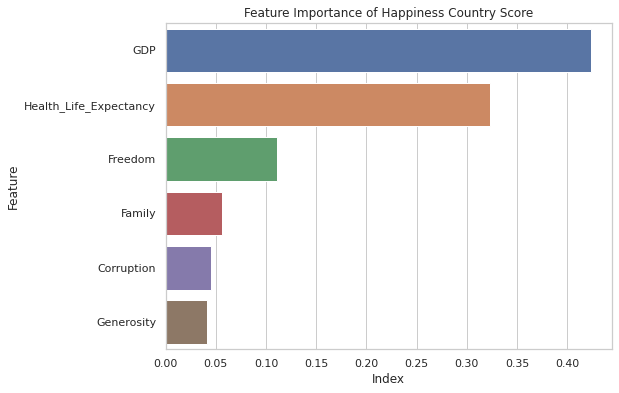

In [ ]:
# get the feature importances of model
ft_importance_values = rf.feature_importances_
# change the data to series
ft_series = pd.Series(ft_importance_values, index = x_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]
# Feature Importance of Happiness Country
plt.figure(figsize=(8,6))
plt.title('Feature Importance of Happiness Country Score')
plt.ylabel('Feature')
plt.xlabel('Index')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

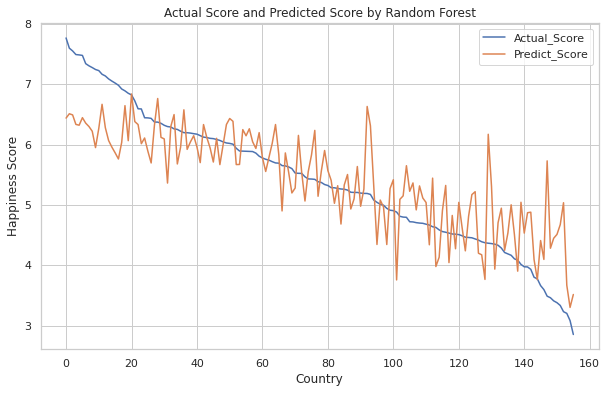

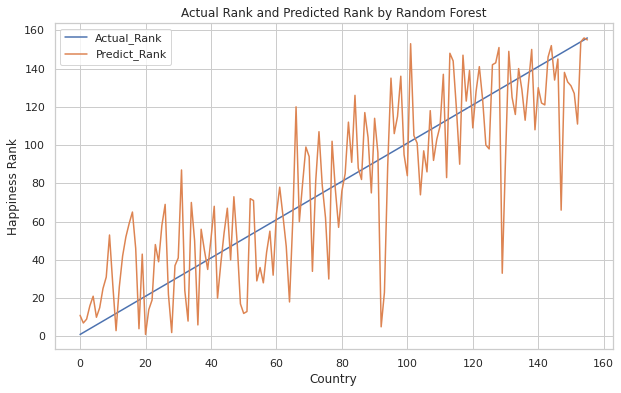

In [ ]:
# Visualization
# Actual Score and Predict Score Compare
prediction["Actual_Score"].plot()
prediction['Predict_Score'].plot()
plt.ylabel('Happiness Score')
plt.xlabel('Country')
plt.title('Actual Score and Predicted Score by Random Forest')
plt.legend(loc='best')
plt.show()


# Actual Score and Predict Rank Compare
prediction["Actual_Rank"].plot()
prediction['Predict_Rank'].plot()
plt.ylabel('Happiness Rank')
plt.xlabel('Country')
plt.title('Actual Rank and Predicted Rank by Random Forest')
plt.legend(loc='best')
plt.show()

In [ ]:
# Visualization of happiness actual score 2019
import plotly.graph_objs as go
data = dict(type = 'choropleth',locations = prediction['Country'],locationmode = "country names",z = prediction['Actual_Score'],
        text = prediction['Country'], colorbar = {'title' : 'Happiness Actual Score'})
layout = dict(title = 'Happiness Actual Score', geo = dict(projection = {'type':'natural earth'}))
fig = go.Figure(data = [data], layout = layout)
fig.update_layout(height=400)
fig.show()

# Visualization of happiness predic score 2019
data = dict(type = 'choropleth',locations = test['Country'],locationmode = "country names",z = prediction['Predict_Score'],
        text = prediction['Country'], colorbar = {'title' : 'Happiness Predict Score'})
layout = dict(title = 'Happiness Predict Score', geo = dict(projection = {'type':'natural earth'}))
fig = go.Figure(data = [data], layout = layout)
fig.update_layout(height=400)
fig.show()

##XGBoost

In [ ]:
#importing libraries
import xgboost as xgb
import pandas as pd
import numpy as np
from matplotlib import pyplot
from xgboost import plot_importance

#Build model
xgb_model = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 100)

#Train model with dataset
xgb_model.fit(x_train, y_train)

#Predict happiness score and rename the column name
y_pred = pd.DataFrame(xgb_model.predict(x_test)).rename(columns={0 : 'Happiness_Score'})

#Add rank column based on happiness score
y_pred['Happiness_Rank'] = y_pred['Happiness_Score'].rank(ascending = False)
y_pred = y_pred.astype({"Happiness_Rank": int}, errors='raise')

# Make dataframe for comparing actual value and predict value
predictxgb = pd.DataFrame({'Country': test['Country'], 'Actual Score': y_test['Happiness_Score'], 'Actual Rank' : test['Happiness_Rank'],
                           'Predicted Score': y_pred['Happiness_Score'], 'Predicted Rank' : y_pred['Happiness_Rank']})
predictxgb

[01:51:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Country,Actual Score,Actual Rank,Predicted Score,Predicted Rank
0,Finland,7.769,1,6.447110,8
1,Denmark,7.600,2,6.451712,7
2,Norway,7.554,3,5.607958,70
3,Iceland,7.494,4,5.936797,40
4,Netherlands,7.488,5,6.116730,21
...,...,...,...,...,...
151,Rwanda,3.334,152,5.027049,114
152,Tanzania,3.231,153,5.107238,107
153,Afghanistan,3.203,154,3.058769,155
154,Central African Republic,3.083,155,3.252236,154


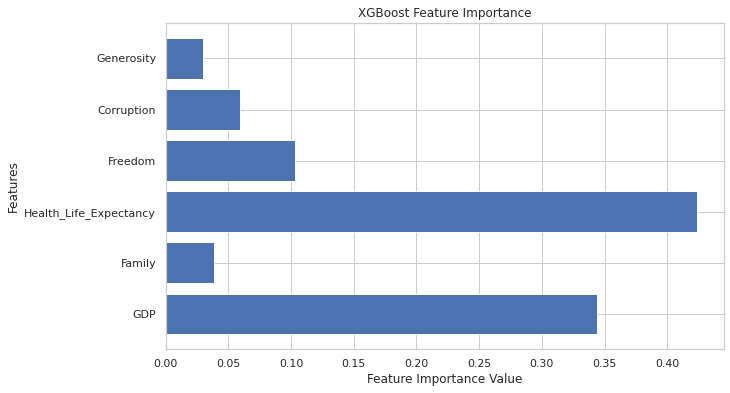

In [ ]:
#Plot Feature Importance
plt.barh(xgb_model.get_booster().feature_names, xgb_model.feature_importances_)
plt.xlabel("Feature Importance Value")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()

In [ ]:
#Model Score
print("Model Score : ",xgb_model.score(x_test, y_test))

#RSME (Root Mean Square Error)
rmse = np.sqrt(mean_squared_error(y_test['Happiness_Score'], y_pred['Happiness_Score']))
print("RMSE : ", rmse)
print('MAE: ', mean_absolute_error(y_test['Happiness_Score'], y_pred['Happiness_Score']))
print('MSE: ', mean_squared_error(y_test['Happiness_Score'], y_pred['Happiness_Score'])) 

Model Score :  0.6161489986736757
RMSE :  0.68742737637913
MAE:  0.5226856151238466
MSE:  0.47255639779549397


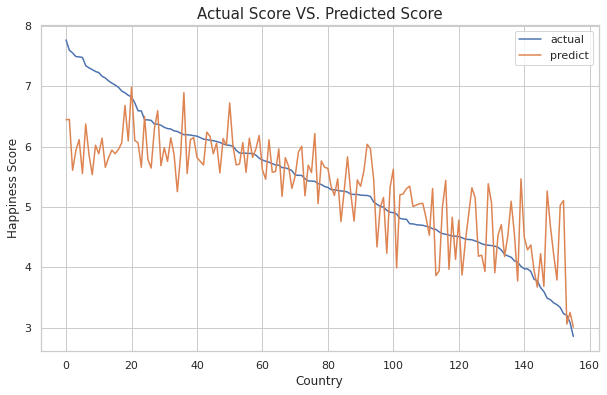

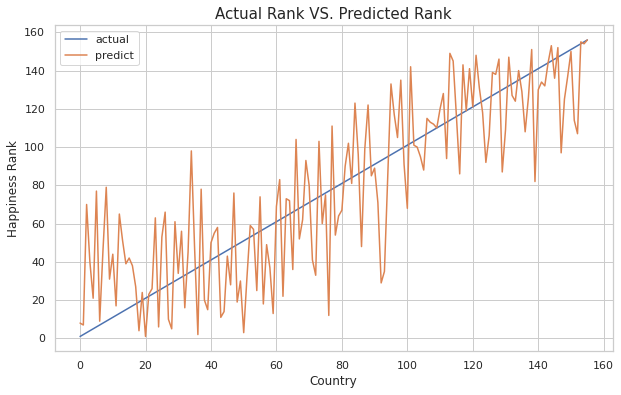

In [ ]:
#Visualization

#Compare actual happiness score vs predicted score
plt.ylabel('Happiness Score')
plt.xlabel('Country')
plt.plot(predictxgb['Actual Score'], label = 'actual')
plt.plot(predictxgb['Predicted Score'], label = 'predict')
plt.title('Actual Score VS. Predicted Score', fontsize=15)
plt.legend(loc='best')
plt.show()


#Compare actual happiness rank vs predicted rank
plt.ylabel('Happiness Rank')
plt.xlabel('Country')
plt.plot(predictxgb['Actual Rank'], label = 'actual')
plt.plot(predictxgb['Predicted Rank'], label = 'predict')
plt.title('Actual Rank VS. Predicted Rank', fontsize=15)
plt.legend(loc='best')
plt.show()